In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import  StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

## Read & Inspect Data

In [2]:
data1=pd.read_csv('road-accidents.csv')
data2=pd.read_csv('miles-driven.csv')
# rename the columns
df=data1.rename(columns={'drvr_fatl_col_bmiles|perc_fatl_speed':'drvr_fatl_col_bmiles',
                        'perc_fatl_alcohol':'perc_fatl_speed','perc_fatl_1st_time':"perc_fatl_alcohol",
                        'Unnamed: 4':'perc_fatl_1st_time'})

In [3]:
df.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89


In [4]:
# Summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 51 non-null     object 
 1   drvr_fatl_col_bmiles  51 non-null     float64
 2   perc_fatl_speed       51 non-null     int64  
 3   perc_fatl_alcohol     51 non-null     int64  
 4   perc_fatl_1st_time    51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [5]:
df.shape

(51, 5)

In [3]:
# Number of null Values
df_null=df.isnull().sum()
null_percentage=df_null*100/len(df)
null_percentage

state                   0.0
drvr_fatl_col_bmiles    0.0
perc_fatl_speed         0.0
perc_fatl_alcohol       0.0
perc_fatl_1st_time      0.0
dtype: float64

## Summary

In [4]:
# Statistical Summary
df.describe().style.background_gradient(cmap="coolwarm")

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
count,51.000000,51.000000,51.000000,51.000000
mean,15.790196,31.725490,30.686275,88.725490
std,4.122002,9.633438,5.132213,6.960110
min,5.900000,13.000000,16.000000,76.000000
25%,12.750000,23.000000,28.000000,83.500000
50%,15.600000,34.000000,30.000000,88.000000
75%,18.500000,38.000000,33.000000,95.000000
max,23.900000,54.000000,44.000000,100.000000


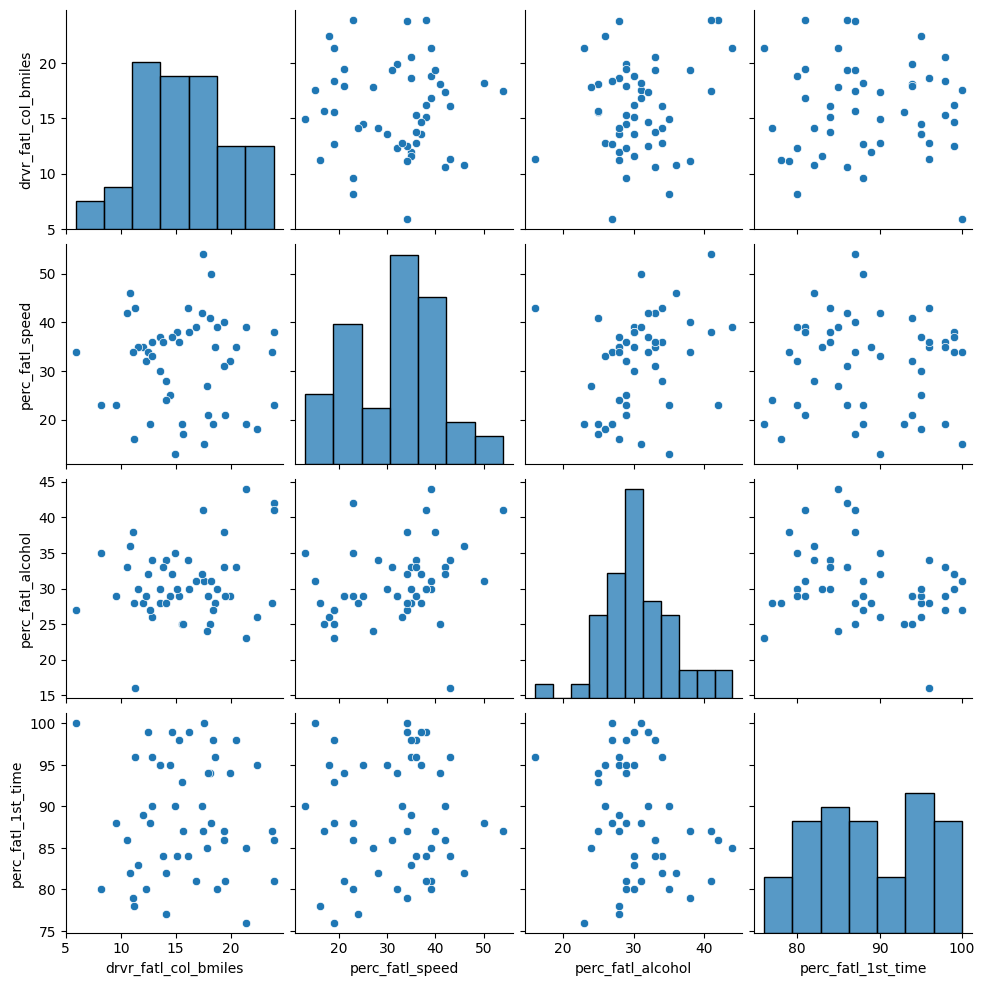

In [8]:
sns.pairplot(df)

In [9]:
df.corr().style.background_gradient()

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000


## Linear Regression

In [3]:
X=df[['perc_fatl_speed', 'perc_fatl_alcohol', 'perc_fatl_1st_time']]
y=df['drvr_fatl_col_bmiles']

In [4]:
lr=LinearRegression().fit(X,y)

In [5]:
print("Intercept: ", lr.intercept_)
print("Cofficient/ Slope: ", lr.coef_)

Intercept:  9.064980483403303
Cofficient/ Slope:  [-0.04180041  0.19086404  0.02473301]


In [6]:
pd.DataFrame(lr.coef_,
             index=['perc_fatl_speed', 'perc_fatl_alcohol', 'perc_fatl_1st_time'],
             columns=['Cofficients'])


,Cofficients
perc_fatl_speed,-0.041800
perc_fatl_alcohol,0.190864
perc_fatl_1st_time,0.024733


## Principal Component Analysis (PCA)

In [11]:
# Take the numeric data
pca_df=df.select_dtypes(include=[np.number])
# make pipeline
pipe=Pipeline([('sacle:', StandardScaler()), ('model:', PCA(n_components=3))]) 

In [12]:
pipe.fit(pca_df)
pca=pipe.fit_transform(pca_df)

In [13]:
df1_pca=pd.DataFrame(pca, columns=['pca_1', 'pca_2', 'pca_3'])
df1_pca.head()

,pca_1,pca_2,pca_3
0,1.022228,0.347463,0.312255
1,-0.494195,-0.635335,-1.065506
2,-0.438965,-0.229955,-1.270957
3,-1.162038,1.665125,-1.495204
4,-0.543588,-0.789038,0.546482


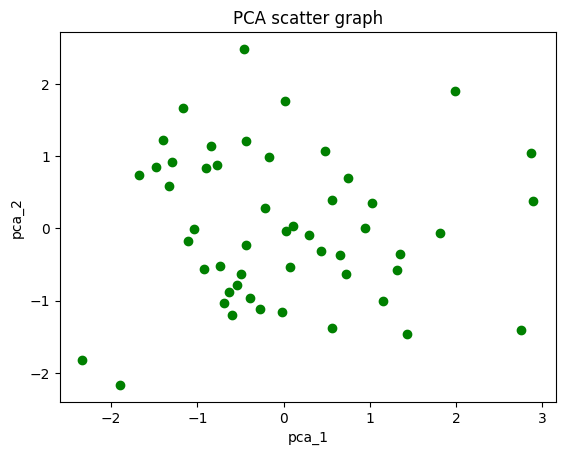

In [14]:
#plt.figure(8,8)
plt.scatter(df1_pca['pca_1'], df1_pca['pca_2'], c='green')
plt.xlabel('pca_1')
plt.ylabel('pca_2')

plt.title('PCA scatter graph')
plt.show()

In [20]:
fig = px.scatter(df1_pca, x="pca_1", y="pca_2", color='pca_3',
                 title='PCA Scatter plot')

fig.show()

## K-mean Cluster

In [18]:
kmn=KMeans(n_clusters=3)
pred=kmn.fit_predict(df1_pca)

In [19]:
df1_pca['cluster']=pred
df1_pca.head()

,pca_1,pca_2,pca_3,cluster
0,1.022228,0.347463,0.312255,0
1,-0.494195,-0.635335,-1.065506,2
2,-0.438965,-0.229955,-1.270957,2
3,-1.162038,1.665125,-1.495204,2
4,-0.543588,-0.789038,0.546482,2


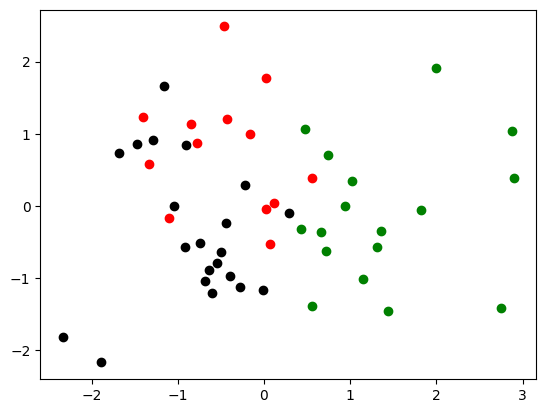

In [20]:
df1=df1_pca[df1_pca['cluster']==0]
df2=df1_pca[df1_pca['cluster']==1]
df3=df1_pca[df1_pca['cluster']==2]
plt.scatter(df1['pca_1'], df1['pca_2'], color='green')
plt.scatter(df2['pca_1'], df2['pca_2'], color='red')
plt.scatter(df3['pca_1'], df3['pca_2'], color='black')
plt.show()

## UnScaled Features

In [49]:
df_unscl=df.select_dtypes(include=[np.number])
model=PCA(n_components=2)
model=model.fit_transform(df_unscl)

In [52]:
pca_un=pd.DataFrame(model, columns=['pca_1', 'pca_2'])
pca_un.head()

,pca_1,pca_2
0,7.130601,-7.672294
1,7.832241,7.309862
2,2.524794,7.816864
3,-14.521312,5.923928
4,2.672486,1.521783


In [53]:
k_mean=KMeans(n_clusters=3)
predict=k_mean.fit_predict(pca_un)
pca_un['cluster']=predict
pca_un.head()

,pca_1,pca_2,cluster
0,7.130601,-7.672294,2
1,7.832241,7.309862,1
2,2.524794,7.816864,1
3,-14.521312,5.923928,0
4,2.672486,1.521783,1


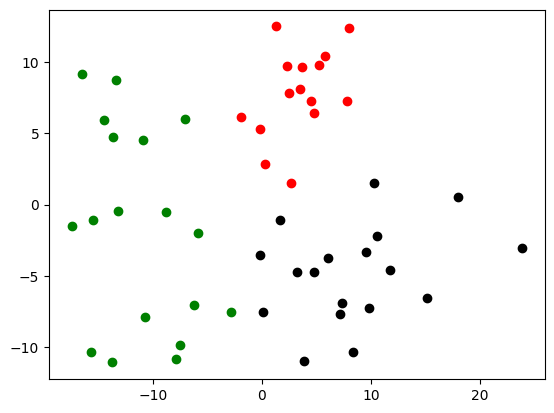

In [64]:
df1_un=pca_un[pca_un['cluster']==0]
df2_un=pca_un[pca_un['cluster']==1]
df3_un=pca_un[pca_un['cluster']==2]
plt.scatter(df1_un['pca_1'], df1_un['pca_2'], color='green')
plt.scatter(df2_un['pca_1'], df2_un['pca_2'], color='red')
plt.scatter(df3_un['pca_1'], df3_un['pca_2'], color='black')
plt.show()

In [70]:
# combine data
df_con=pd.concat([df,pca_un['cluster'], data2['drvr_fatl_col_bmiles']], axis=1)

KeyError: 'drvr_fatl_col_bmiles'

Text(0.5, 1.0, 'violin plot ')

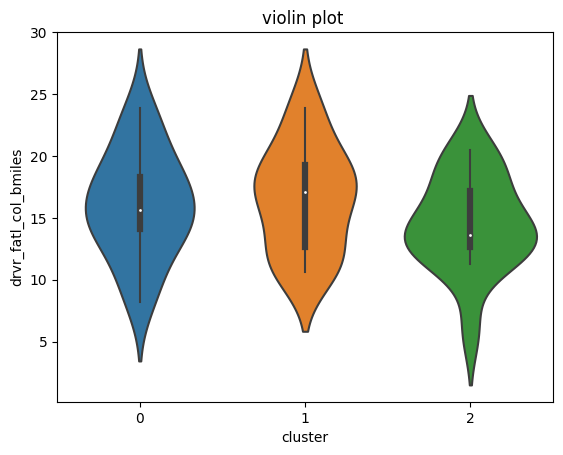

In [56]:
sns.violinplot(x=df_con["cluster"], y=df_con["drvr_fatl_col_bmiles"])
plt.title('violin plot ')

In [68]:
fig=px.pie(df_con, values='drvr_fatl_col_bmiles',
           names='cluster',hole=.4)
fig.show()